### 模型篩選 XGBOOST forcast

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import seaborn as sns
import sklearn

### import data

In [12]:

data = pd.read_csv('/Users/christine_sieh/workspace/Electric price_caculator/#1 dataclean/sunroof_train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41994 entries, 0 to 41993
Columns: 149 entries, Unnamed: 0 to avg_electricity_retail_rate
dtypes: float64(95), int64(52), object(2)
memory usage: 47.7+ MB


### 選定變數與自變數

In [13]:

y=data.iloc[:,1] 
X=data.iloc[:,4:] 

### 切割訓練資料與測試資料

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=101)

In [15]:
X_train

,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
4024,32.460384,-93.792777,1075.25,61839,389431,941322,610524,774652,2603903,38.0,...,17,7,4,14,0,0,23,0,0,7.63
22992,39.787649,-86.133906,991.10,252086,949430,3842438,2106138,3017937,8440995,29.0,...,22,4,7,13,0,0,7,0,0,8.86
15918,38.364569,-81.680684,967.30,35695,156045,422743,343868,340406,1024294,30.0,...,15,3,2,8,0,0,0,0,0,8.16
646,40.446405,-79.963771,948.60,283639,947681,2799719,2051441,2309508,6351232,23.0,...,31,6,9,12,0,0,0,0,0,10.26
32677,34.195701,-117.332870,1447.55,440268,538454,6387449,2806033,4761205,11681419,32.0,...,85,15,16,21,9,0,38,0,10,14.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,38.552566,-82.760467,986.00,3221,15362,44305,29560,32664,84210,32.0,...,25,4,9,13,0,0,0,0,0,7.93
5695,35.355135,-111.657306,1396.55,18145,38890,284531,179402,202154,600794,32.0,...,41,8,15,8,0,0,11,20,0,10.15
8006,41.446526,-81.674658,932.45,335386,1090154,4221993,1930982,3076757,11490674,24.0,...,29,7,12,18,0,0,0,0,0,9.57
17745,41.647195,-86.813976,954.55,5959,33939,87775,57460,73619,389301,27.0,...,22,4,7,13,0,0,7,0,0,8.86


In [16]:
y_train

4024     14436100.80
22992    24428023.56
15918     9421549.20
646      21353453.40
32677     6659774.64
            ...     
12363    33987365.28
5695     20934777.60
8006     27208753.44
17745    24428023.56
17931    68470502.40
Name: Electricity_cost_total, Length: 28135, dtype: float64

### 定義模型ＸＧＢＯＯＳＴ

In [17]:
from xgboost import XGBRegressor
xgbc = XGBRegressor()

### 訓練

In [18]:
xgbc.fit(X_train, y_train)
XGB_pred=xgbc.predict(X_test)
print(XGB_pred)

[27211496.   8295704.5 10003481.  ... 37430432.  37431340.  47323892. ]


In [19]:
XGBtrain_score=xgbc.score(X_train, y_train)
print(XGBtrain_score)

0.9999999774133383


In [20]:
XGBtest_score=xgbc.score(X_test,y_test)
print('The accuracy of XGBOOST Regessior on testing set:', XGBtest_score)

The accuracy of XGBOOST Regessior on testing set: 0.9999930471451838


In [21]:
predY=xgbc.predict(X_test)
predY

array([27211496. ,  8295704.5, 10003481. , ..., 37430432. , 37431340. ,
       47323892. ], dtype=float32)

In [22]:
## model error
predY_train = xgbc.predict(X_train)
predY_test = xgbc.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE
print( 'R square', r2_score(y_train, predY_train) )
print("MSE test ", mean_squared_error(y_train, predY_train)) # how much variance the model explains?

R square 0.9999999774133383
MSE test  18597341.37985243


In [23]:
print( 'R square', r2_score(y_test, predY_test) )
print("MSE test ", mean_squared_error(y_test, predY_test))

R square 0.9999930471451838
MSE test  5782862917.18269


訓練與測試的準確度（accuracy）以及 R square 都是 0.99

### Model explanation by shap
找出影響模型最多的特徵（feature）

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


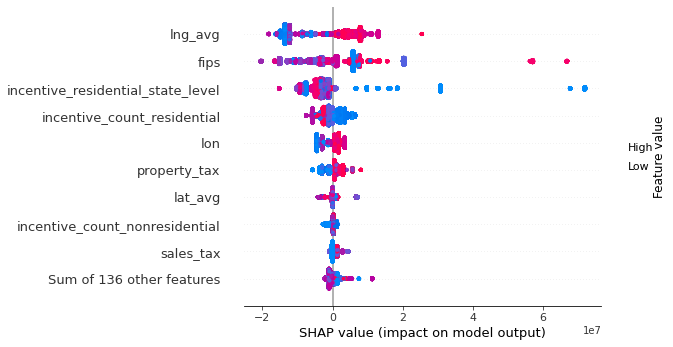

In [24]:
import shap
explainer = shap.Explainer(xgbc)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

Ing_avg <br>
fips<br>
incentive_residential_state_level<br>
incentive_count_residential<br>
lon<br>
property_tax<br>
net_metering<br>
lat_avg<br>
incentive_count_nonresidential<br>
sales_tax


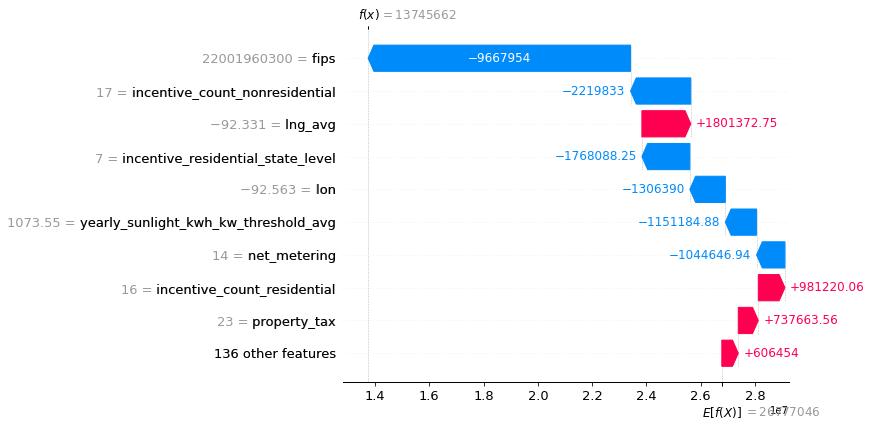

In [25]:
shap.plots.waterfall(shap_values[0])

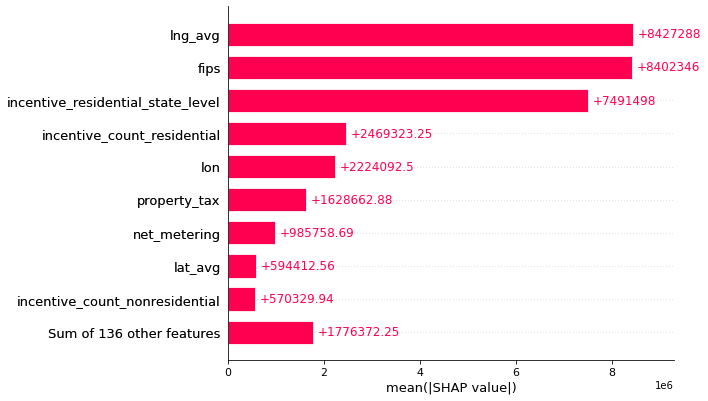

In [26]:
shap.plots.bar(shap_values)

發現跟影響模型準確地域性有高度相關<br>
像是郵遞代碼fips<br>
lon(經度)<br>
lat(緯度)<br>
因為模型太準所以先把這些地域性的特徵移出在訓練一次

In [30]:
data=data.drop(columns=['lng_avg','fips','lon','lat_avg','lat'])

In [31]:
y=data.iloc[:,1] 
X=data.iloc[:,4:] 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=101)

In [33]:
from xgboost import XGBRegressor
xgbc = XGBRegressor()

In [34]:
xgbc.fit(X_train, y_train)
XGB_pred=xgbc.predict(X_test)
print(XGB_pred)

[27212078.  8330861. 10004602. ... 37428296. 37431412. 47325976.]


In [35]:
XGBtrain_score=xgbc.score(X_train, y_train)
print(XGBtrain_score)

0.9999999482488421


In [36]:
XGBtest_score=xgbc.score(X_test,y_test)
print('The accuracy of XGBOOST Regessior on testing set:', XGBtest_score)

The accuracy of XGBOOST Regessior on testing set: 0.9999879791433655


In [37]:
## model error
predY_train = xgbc.predict(X_train)
predY_test = xgbc.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE
print( 'R square', r2_score(y_train, predY_train) )
print("MSE test ", mean_squared_error(y_train, predY_train)) # how much variance the model explains?

R square 0.9999999482488421
MSE test  42610721.66426674


In [38]:
print( 'R square', r2_score(y_test, predY_test) )
print("MSE test ", mean_squared_error(y_test, predY_test))

R square 0.9999879791433655
MSE test  9998046543.659134


把地域性的選項篩掉後還是很高....

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


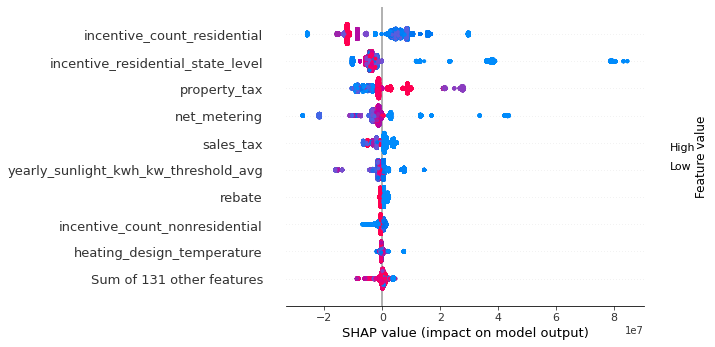

In [39]:
import shap
explainer = shap.Explainer(xgbc)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

<br>incentive_count_residential (政府獎勵住家安裝太陽能的數量)
<br>incentive_residential_state_level（政府獎勵安裝太陽能的程度）
<br>property_tax（稅金比率）
<br>net_metering（綠能的淨計量電價）
<br>sales_tax （銷售稅）
<br>yearly_sunlight_kwh_kw_threshold_avg （地區前75%最佳的陽光發電度數/KW(千瓦)）
<br>rebate（返利計劃啟動以來的年數） 
<br>incentive_count_nonresidential （政府獎勵非住家安裝太陽能的數量）
<br>heating_design_temperature （加熱系統的溫度）
